<img src="https://academy.divar.ir/real-estate/wp-content/uploads/2021/04/market-analysis-97-99.jpg" width=80% />

<div class="alert alert-block alert-success">
    <h1 align="center">House price prediction (Tehran) in Python</h1>
    <h3 align="center">Dataset is crawled from Divar.ir</h3>
    <h4 align="center"><a href="http://www.iran-machinelearning.ir">Soheil Tehranipour</a></h5>
</div>

# Topics:

- [ ] Import the Dataset (House Prices in Tehran)
- [ ] What about the Data ? (EDA)
- [ ] Preprocessing (Handling Missing Values, Encoding data, Scale & Cross-validation)
- [ ] Linear Regreassion in action 
- [ ] Multiple Linear Regreassion in action 
- [ ] Random forest in action (Regression)
- [ ] XGBoost in action (Regression)

# House Price Prediction in Action (Regression)

## Importing the libraries

In [31]:
# !pip install xgboost

In [32]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,GradientBoostingRegressor
from sklearn.linear_model import  ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

import joblib

import warnings
warnings.filterwarnings('ignore')

## Load and Prepare Data

In [33]:
#Read the dataset and print the top 5 elements of the dataset
df = pd.read_csv('tehranhouses.csv')
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1850000000,61667
1,60,1,True,True,True,Shahran,1850000000,61667
2,79,2,True,True,True,Pardis,550000000,18333
3,95,2,True,True,True,Shahrake Qods,902500000,30083
4,123,2,True,True,True,Shahrake Gharb,7000000000,233333


In [34]:
df.sample(5)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
2553,75,2,False,False,False,Parand,245000000,8167
1583,66,2,True,False,True,Ostad Moein,1580000000,52667
1775,120,3,True,True,True,Persian Gulf Martyrs Lake,590000000,19667
877,138,3,True,True,True,Kahrizak,1242000000,41400
3468,81,2,True,True,True,West Ferdows Boulevard,4455000000,148500


In [35]:
type(df)

pandas.core.frame.DataFrame

In [36]:
pip install autoviz -q

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement panel>=1.4.0 (from autoviz) (from versions: 0.0.1, 0.3.0, 0.3.1, 0.4.0, 0.5.1, 0.6.0, 0.6.2, 0.6.3, 0.6.4, 0.7.0, 0.8.0, 0.8.1, 0.8.2, 0.8.3, 0.9.0, 0.9.1, 0.9.2, 0.9.3, 0.9.4, 0.9.5, 0.9.6, 0.9.7, 0.10.0, 0.10.1, 0.10.2, 0.10.3rc1, 0.10.3, 0.11.0b1, 0.11.0rc3, 0.11.0rc4, 0.11.0rc5, 0.11.0rc6, 0.11.0rc7, 0.11.0, 0.11.1, 0.11.2a1, 0.11.2a2, 0.11.2a3, 0.11.2a4, 0.11.2, 0.11.3, 0.12.0a1, 0.12.0a2, 0.12.0a3, 0.12.0a4, 0.12.0a5, 0.12.0a6, 0.12.0a7, 0.12.0a8, 0.12.0a9, 0.12.0a10, 0.12.0a11, 0.12.0a12, 0.12.0a13, 0.12.0a15, 0.12.0a16, 0.12.0a17, 0.12.0a18, 0.12.0a20, 0.12.0a21, 0.12.0a22, 0.12.0rc1, 0.12.0rc2, 0.12.0rc3, 0.12.0rc4, 0.12.0rc5, 0.12.0rc6, 0.12.0rc7, 0.12.0rc8, 0.12.0rc10, 0.12.0rc11, 0.12.0rc12, 0.12.0rc13, 0.12.0, 0.12.1a1, 0.12.1rc1, 0.12.1rc2, 0.12.1rc3, 0.12.1rc4, 0.12.1, 0.12.2rc1, 0.12.2, 0.12.3rc1, 0.12.3, 0.12.4rc1, 0.12.4rc2, 0.12.4rc3, 0.12.4, 0.12.5rc1, 0.12.5rc2, 0.12.5rc3, 0.12.5, 0.12.6rc1, 0.12.6rc2, 

In [37]:
from pycaret.regression import *

In [38]:
df=df.drop("Price(USD)",axis=1)

In [39]:
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,True,True,True,Shahran,1850000000
1,60,1,True,True,True,Shahran,1850000000
2,79,2,True,True,True,Pardis,550000000
3,95,2,True,True,True,Shahrake Qods,902500000
4,123,2,True,True,True,Shahrake Gharb,7000000000
...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3500000000
3475,83,2,True,True,True,Niavaran,6800000000
3476,75,2,False,False,False,Parand,365000000
3477,105,2,True,True,True,Dorous,5600000000


In [40]:
setup(df,target='Price',session_id=85,remove_outliers=True)

,Description,Value
0,Session id,85
1,Target,Price
2,Target type,Regression
3,Original data shape,"(3479, 7)"
4,Transformed data shape,"(3357, 7)"
5,Transformed train set shape,"(2313, 7)"
6,Transformed test set shape,"(1044, 7)"
7,Numeric features,1
8,Categorical features,2
9,Rows with missing values,0.7%


In [41]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [42]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1787068173.7997,32607070799563259904.0000,5370151246.9630,0.5414,0.5069,0.4474,0.8770
et,Extra Trees Regressor,1817845651.8962,33520492428413251584.0000,5407713658.5829,0.5387,0.5174,0.4342,0.2890
lightgbm,Light Gradient Boosting Machine,1850921321.3913,33901565924708720640.0000,5473993494.4639,0.5246,0.4909,0.4263,0.2340
gbr,Gradient Boosting Regressor,1869615141.1658,32771862574859378688.0000,5452077188.9199,0.5211,0.5212,0.4816,0.1870
xgboost,Extreme Gradient Boosting,1786040719.9583,33936436112262541312.0000,5497412986.6424,0.5201,0.5249,0.4220,0.1600
rf,Random Forest Regressor,1834918436.3653,35106093936664793088.0000,5550384845.2397,0.5137,0.5014,0.4146,0.3010
knn,K Neighbors Regressor,2037573046.1581,37179143718031081472.0000,5747517834.8901,0.4781,0.5656,0.5161,0.1610
lasso,Lasso Regression,2601293634.5707,36766956168881344512.0000,5814135285.5933,0.4616,0.9709,1.0037,0.1200
lr,Linear Regression,2601293636.7989,36766956358024577024.0000,5814135307.9479,0.4616,0.9709,1.0037,0.4410
llar,Lasso Least Angle Regression,2601293634.5707,36766956168881344512.0000,5814135285.5933,0.4616,0.9709,1.0037,0.1210


In [43]:
my_model=create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2479387095.1475,51988547739873558528.0000,7210308435.8350,0.4964,0.6233,0.4693
1,1815818174.9508,46944923974259638272.0000,6851636590.9365,0.4959,0.4994,0.4204
2,1499436240.7213,21151433448621871104.0000,4599068758.8491,0.5200,0.5420,0.5832
3,1790795397.4836,51692290135028080640.0000,7189735053.1872,0.3209,0.5222,0.3671
4,2119837128.0656,40256157986120228864.0000,6344774068.9579,0.4099,0.4992,0.4068
5,2285190611.5350,48404015327652683776.0000,6957299427.7703,0.4076,0.5484,0.4099
6,2065661687.1770,53211517474756812800.0000,7294622503.9242,0.4073,0.4827,0.3888
7,1316253740.0494,11084801865211983872.0000,3329384607.5832,0.5942,0.4347,0.3541
8,1466868110.7160,11212804864307042304.0000,3348552652.1629,0.6780,0.5097,0.4051


# Explore the data (EDA)

In [44]:
df.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price'], dtype='object')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Area       3479 non-null   object
 1   Room       3479 non-null   int64 
 2   Parking    3479 non-null   bool  
 3   Warehouse  3479 non-null   bool  
 4   Elevator   3479 non-null   bool  
 5   Address    3456 non-null   object
 6   Price      3479 non-null   int64 
dtypes: bool(3), int64(2), object(2)
memory usage: 119.0+ KB


In [46]:
df.shape

(3479, 7)

In [47]:
df.describe()

,Room,Price
count,3479,3479
mean,2,5359022711
std,1,8099934524
min,0,3600000
25%,2,1418250000
50%,2,2900000000
75%,2,6000000000
max,5,92400000000


In [48]:
# eda()

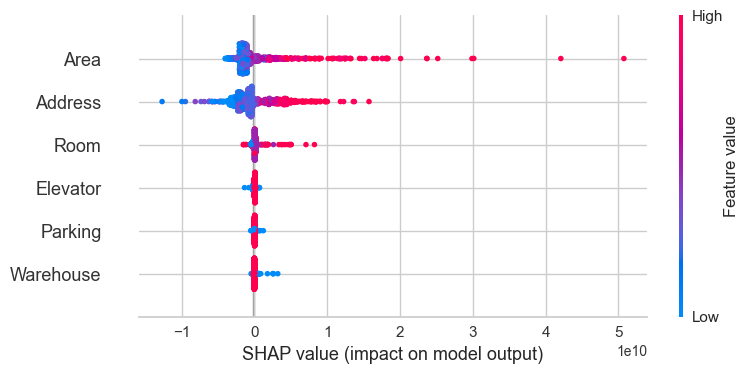

In [49]:
interpret_model(my_model)

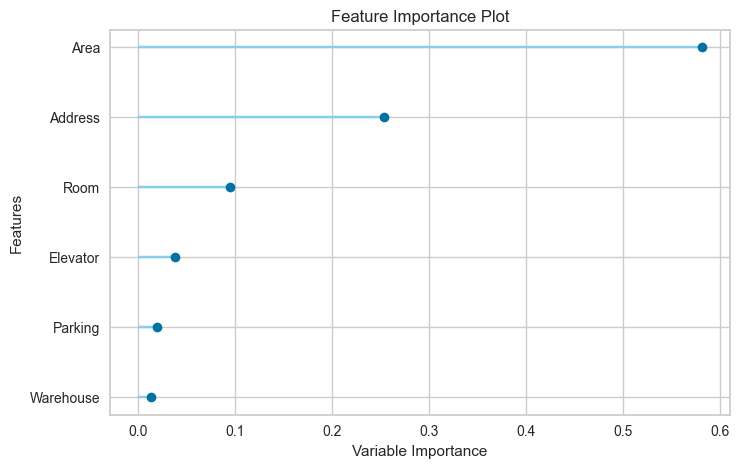

In [50]:
plot_model(estimator=my_model,plot='feature')

In [51]:
df['Area'] = df['Area'].apply(lambda x: re.sub(',', '', x))
df["Area"] = pd.to_numeric(df["Area"] , errors='coerce')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Area       3479 non-null   int64 
 1   Room       3479 non-null   int64 
 2   Parking    3479 non-null   bool  
 3   Warehouse  3479 non-null   bool  
 4   Elevator   3479 non-null   bool  
 5   Address    3456 non-null   object
 6   Price      3479 non-null   int64 
dtypes: bool(3), int64(3), object(1)
memory usage: 119.0+ KB


In [53]:
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,True,True,True,Shahran,1850000000
1,60,1,True,True,True,Shahran,1850000000
2,79,2,True,True,True,Pardis,550000000
3,95,2,True,True,True,Shahrake Qods,902500000
4,123,2,True,True,True,Shahrake Gharb,7000000000
...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3500000000
3475,83,2,True,True,True,Niavaran,6800000000
3476,75,2,False,False,False,Parand,365000000
3477,105,2,True,True,True,Dorous,5600000000


In [54]:
df.describe()

,Area,Room,Price
count,3479,3479,3479
mean,8744000,2,5359022711
std,316726629,1,8099934524
min,30,0,3600000
25%,69,2,1418250000
50%,90,2,2900000000
75%,120,2,6000000000
max,16160000000,5,92400000000


In [55]:
df.shape

(3479, 7)

In [56]:
# check for data type
print(df.dtypes)

Area          int64
Room          int64
Parking        bool
Warehouse      bool
Elevator       bool
Address      object
Price         int64
dtype: object


In [57]:
df.isnull().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address      23
Price         0
dtype: int64

In [58]:
len(df.Address.unique())

193

In [59]:
# I will drop missing values although it is not necessary because used models can manage missing values.
df.dropna(inplace=True)

In [60]:
df.shape

(3456, 7)

In [61]:
df['Parking'].value_counts(normalize=True)*100

True    85
False   15
Name: Parking, dtype: float64

In [62]:
pd.crosstab( df.Parking, df.Room )

Room,0,1,2,3,4,5
Parking,,,,,,
False,8,243,244,26,1,5
True,2,426,1699,705,69,28


In [63]:
below_85 = df[ df.Area <= 85 ]
len(below_85)

1522

In [64]:
df[ df.Area <= 85 ]["Parking"].value_counts( )

True     1104
False     418
Name: Parking, dtype: int64

In [65]:
df.Address.unique()


array(['Shahran', 'Pardis', 'Shahrake Qods', 'Shahrake Gharb',
       'North Program Organization', 'Andisheh', 'West Ferdows Boulevard',
       'Narmak', 'Saadat Abad', 'Zafar', 'Islamshahr', 'Pirouzi',
       'Shahrake Shahid Bagheri', 'Moniriyeh', 'Velenjak', 'Amirieh',
       'Southern Janatabad', 'Salsabil', 'Zargandeh', 'Feiz Garden',
       'Water Organization', 'ShahrAra', 'Gisha', 'Ray', 'Abbasabad',
       'Ostad Moein', 'Farmanieh', 'Parand', 'Punak', 'Qasr-od-Dasht',
       'Aqdasieh', 'Pakdasht', 'Railway', 'Central Janatabad',
       'East Ferdows Boulevard', 'Pakdasht KhatunAbad', 'Sattarkhan',
       'Baghestan', 'Shahryar', 'Northern Janatabad', 'Daryan No',
       'Southern Program Organization', 'Rudhen', 'West Pars', 'Afsarieh',
       'Marzdaran', 'Dorous', 'Sadeghieh', 'Chahardangeh', 'Baqershahr',
       'Jeyhoon', 'Lavizan', 'Shams Abad', 'Fatemi',
       'Keshavarz Boulevard', 'Kahrizak', 'Qarchak',
       'Northren Jamalzadeh', 'Azarbaijan', 'Bahar',
       'P

In [66]:
len(df.Address.unique())

192

In [67]:
round(df.Price.mean())

5379956887

In [68]:
df.groupby( 'Room' )['Price'].mean()

Room
0    7860500000
1    1707480867
2    3330303037
3   10938692886
4   25600328571
5   33734393939
Name: Price, dtype: float64

In [69]:
pd.set_option('display.float_format', lambda x: '%.f' % x)

In [70]:
room_parking_room_mean_df = df.groupby( ['Room','Parking'] )['Price'].mean().reset_index()
room_parking_room_mean_df

,Room,Parking,Price
0,0,False,9769750000
1,0,True,223500000
2,1,False,1139677778
3,1,True,2031368545
4,2,False,1501674180
5,2,True,3592919541
6,3,False,5107865385
7,3,True,11153730496
8,4,False,6200000000
9,4,True,25881492754


In [71]:
df2 = df.copy()

<img src="https://miro.medium.com/max/673/1*qjgJioWHslZbbm9JW_rIDw.png" width=60% />

In [72]:
df2.loc[:, "Price"] =df["Price"].map('{:,.0f}'.format)

In [73]:
df2

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,True,True,True,Shahran,"1,850,000,000"
1,60,1,True,True,True,Shahran,"1,850,000,000"
2,79,2,True,True,True,Pardis,"550,000,000"
3,95,2,True,True,True,Shahrake Qods,"902,500,000"
4,123,2,True,True,True,Shahrake Gharb,"7,000,000,000"
...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,"3,500,000,000"
3475,83,2,True,True,True,Niavaran,"6,800,000,000"
3476,75,2,False,False,False,Parand,"365,000,000"
3477,105,2,True,True,True,Dorous,"5,600,000,000"


In [74]:
df.dtypes

Area          int64
Room          int64
Parking        bool
Warehouse      bool
Elevator       bool
Address      object
Price         int64
dtype: object

# Visualizaion

<Figure size 800x500 with 0 Axes>

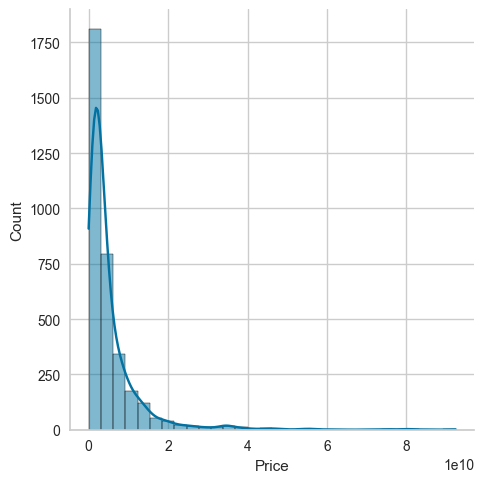

In [75]:
plt.figure(figsize=(8,5))
sns.displot(df['Price'] , bins=30 , kde=True )

<AxesSubplot: >

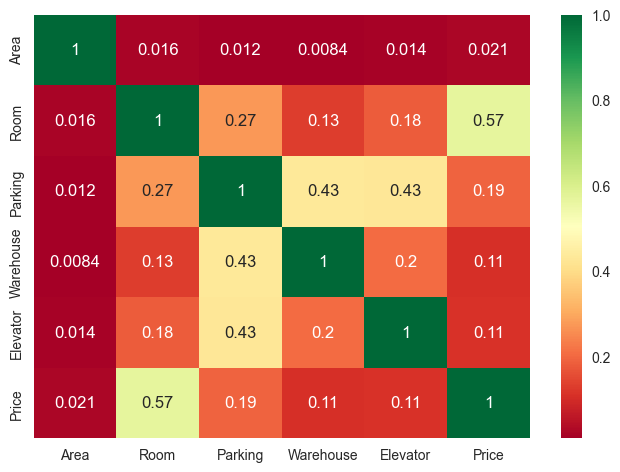

In [76]:
sns.heatmap(df.corr(), annot=True,cmap='RdYlGn')

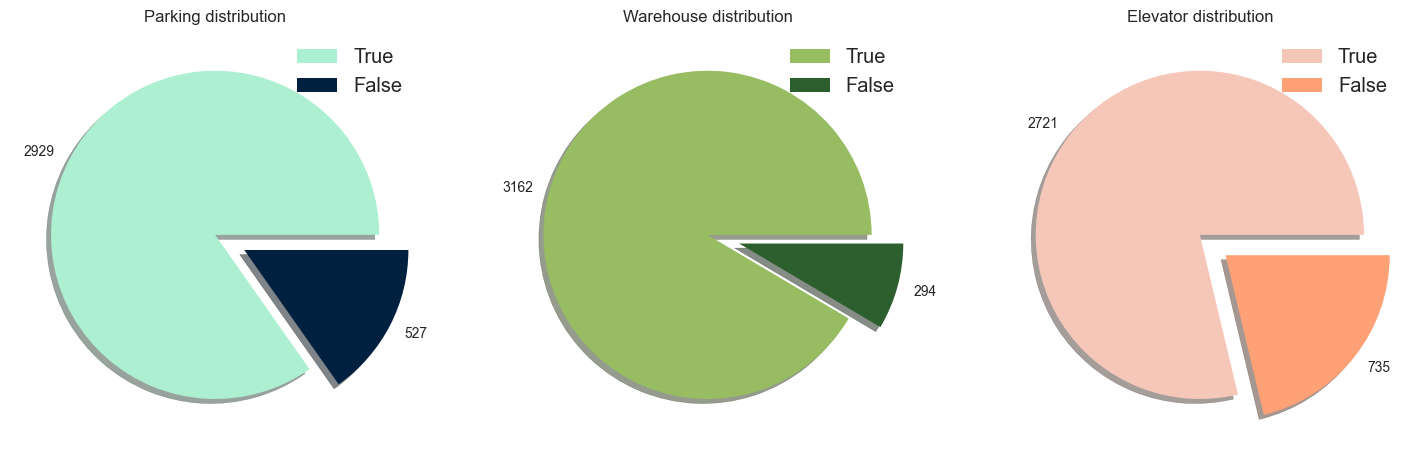

In [77]:
fig, ax = plt.subplots(ncols=3, figsize=(18,6))

colors = [['#ADEFD1FF', '#00203FFF'], ['#97BC62FF', '#2C5F2D'], ['#F5C7B8FF', '#FFA177FF']]
explode = [0, 0.2]
columns = ['Parking', 'Warehouse', 'Elevator']
for i in range(3):
        data = df[columns[i]].value_counts()
        ax[i].pie(data, labels=data.values, explode=explode, colors=colors[i], shadow=True)
        ax[i].legend(labels=data.index, fontsize='large')
        ax[i].set_title('{} distribution'.format(columns[i]))

In [78]:
df3 = df['Address'].value_counts().copy()
df3 = df3[:8]


In [79]:
df3

Punak                     161
Pardis                    146
West Ferdows Boulevard    145
Gheitarieh                141
Shahran                   130
Saadat Abad               129
Parand                    127
Shahr-e-Ziba              109
Name: Address, dtype: int64

Text(0.5, 1.0, 'Number of flats in location')

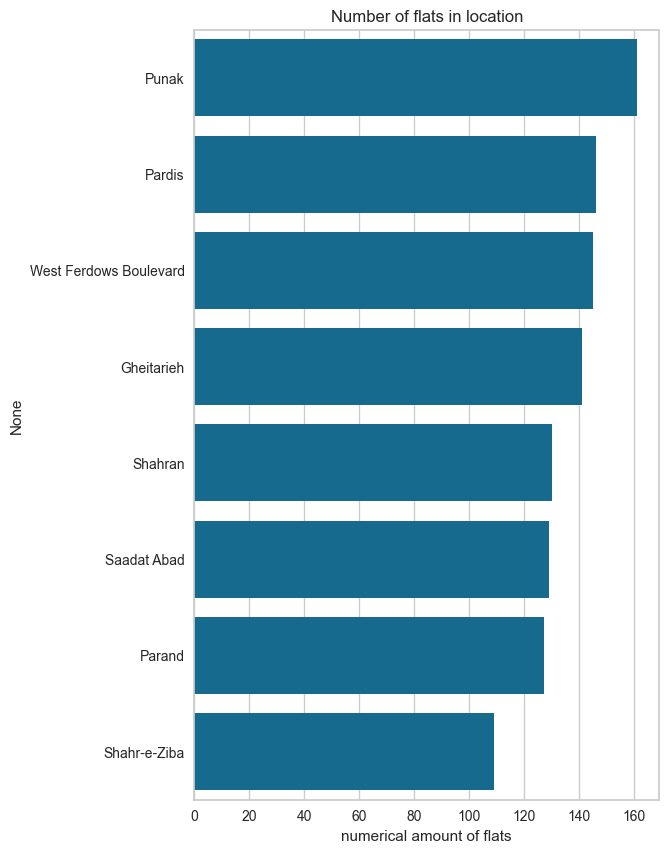

In [80]:
fig, ax = plt.subplots(figsize=(6,10))
sns.barplot(x=df3.values, y=df3.index,ax=ax)
plt.xlabel('numerical amount of flats')
plt.title('Number of flats in location')

In [81]:
df.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price'], dtype='object')

In [82]:
df.sort_values('Price',ascending=False)[['Address']].head(20)

,Address
1707,Zaferanieh
1810,Abazar
430,Lavasan
819,Ekhtiarieh
1332,Niavaran
1694,Zafar
3051,Dorous
3107,Tajrish
831,Mahmoudieh
2394,Aqdasieh


# Preprocessing

<img src="https://www.kdnuggets.com/wp-content/uploads/text-data-task-framework-preprocessing.png" width=75% />

In [83]:
df.isnull().sum()

Area         0
Room         0
Parking      0
Warehouse    0
Elevator     0
Address      0
Price        0
dtype: int64

In [84]:
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,True,True,True,Shahran,1850000000
1,60,1,True,True,True,Shahran,1850000000
2,79,2,True,True,True,Pardis,550000000
3,95,2,True,True,True,Shahrake Qods,902500000
4,123,2,True,True,True,Shahrake Gharb,7000000000
...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3500000000
3475,83,2,True,True,True,Niavaran,6800000000
3476,75,2,False,False,False,Parand,365000000
3477,105,2,True,True,True,Dorous,5600000000


# Model Building

In [85]:
# df = df.drop(columns = ['Price(USD)'])
boolean_features = ['Parking','Warehouse','Elevator']
df[boolean_features] = df[boolean_features].astype('int64')

df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,1,1,1,Shahran,1850000000
1,60,1,1,1,1,Shahran,1850000000
2,79,2,1,1,1,Pardis,550000000
3,95,2,1,1,1,Shahrake Qods,902500000
4,123,2,1,1,1,Shahrake Gharb,7000000000


In [86]:
print(f"Skewness of features:\n{df.skew()}")


Skewness of features:
Area        44
Room         1
Parking     -2
Warehouse   -3
Elevator    -1
Price        5
dtype: float64


<AxesSubplot: xlabel='Price'>

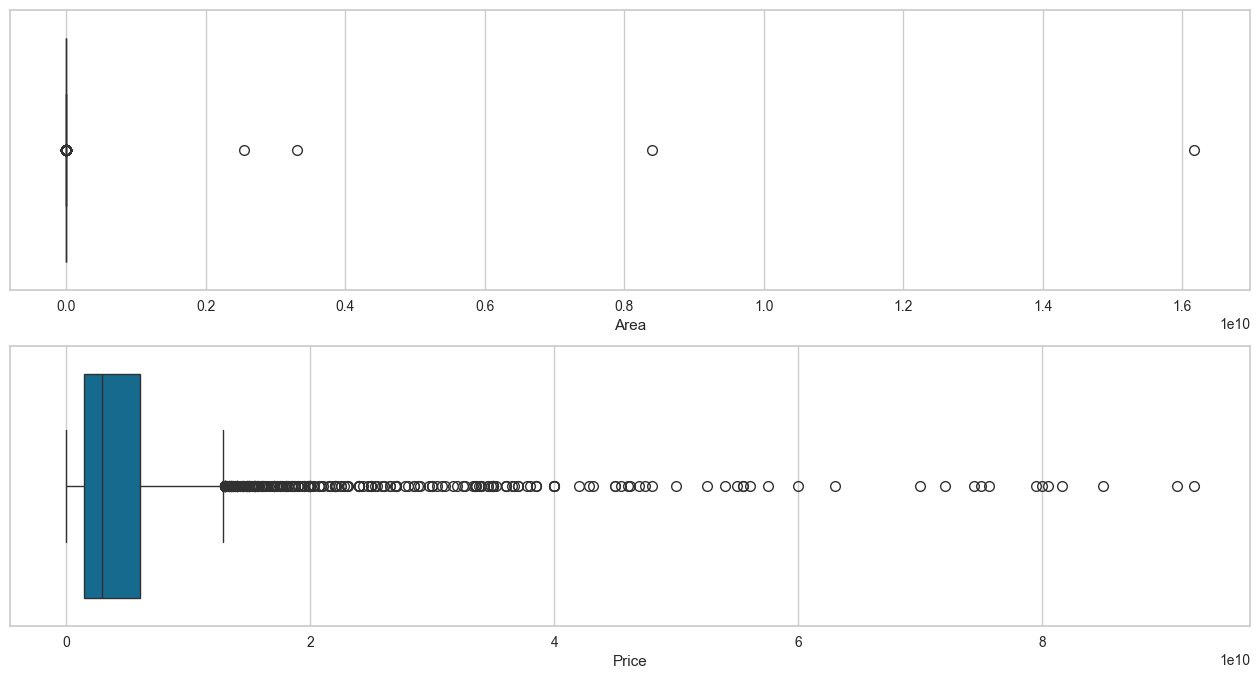

In [87]:
plt.figure(figsize = (16,8))

plt.subplot(2,1,1)
sns.boxplot(x = df['Area'])

plt.subplot(2,1,2)
sns.boxplot(x = df['Price'])

In [88]:
def lower_upper(x):
    Q1 = np.percentile(x, 25)
    Q3 = np.percentile(x, 75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    return lower, upper

lower_area, upper_area = lower_upper(df['Area'])
lower_price, upper_price = lower_upper(df['Price'])

print(f"Lower limit for area: {lower_area:0.2f}")
print(f"Upper limit for area: {upper_area:0.2f}")
print(f"Lower limit for price: {lower_price:,}")
print(f"Upper limit for price: {upper_price:,}")

Lower limit for area: -9.00
Upper limit for area: 199.00
Lower limit for price: -5,450,000,000.0
Upper limit for price: 12,870,000,000.0


In [89]:
area_outliers = np.where(df['Area'] > upper_area)
price_outliers = np.where(df['Price'] > upper_price)
# Return the unique, sorted array of values that are in either of the two input arrays.
total_outliers = np.union1d(area_outliers, price_outliers)

print(f"Number of area outliers: {len(df.iloc[area_outliers])}")
print(f"Number of price outliers: {len(df.iloc[price_outliers])}")
print(f"Number of outliers: {len(df.iloc[total_outliers])}")

Number of area outliers: 237
Number of price outliers: 310
Number of outliers: 366


In [90]:
total_outliers



array([  25,   58,   83,  101,  145,  159,  160,  166,  173,  176,  187,
        189,  193,  195,  196,  200,  210,  215,  218,  220,  226,  234,
        235,  238,  260,  262,  264,  269,  270,  281,  283,  284,  297,
        299,  315,  327,  329,  338,  339,  340,  342,  343,  344,  345,
        346,  347,  348,  349,  351,  353,  355,  356,  362,  363,  364,
        394,  410,  411,  412,  429,  430,  436,  439,  458,  463,  496,
        512,  514,  515,  516,  525,  534,  547,  553,  559,  564,  565,
        566,  567,  569,  572,  576,  577,  578,  579,  582,  599,  600,
        610,  627,  635,  638,  640,  641,  648,  649,  652,  706,  712,
        721,  729,  730,  731,  738,  739,  740,  753,  765,  792,  803,
        804,  816,  819,  828,  834,  836,  849,  872,  876,  891,  955,
        956,  962, 1005, 1006, 1012, 1021, 1022, 1028, 1031, 1033, 1103,
       1110, 1114, 1128, 1136, 1137, 1148, 1174, 1175, 1228, 1230, 1231,
       1232, 1258, 1260, 1265, 1266, 1270, 1282, 12

In [91]:
total_outliers.dtype

dtype('int64')

In [92]:
# total_outliers=np.delete(total_outliers,97)

In [93]:
# total_outliers

In [94]:
# df = df.copy()
# df.drop(total_outliers, inplace = True)
# df.reset_index(drop = True, inplace = True)
# print(f"Shape of new dataset: {df.shape}")

In [95]:
# print(f"Skewness of features after drop outliers:\n{df.skew()}")


<AxesSubplot: xlabel='Price'>

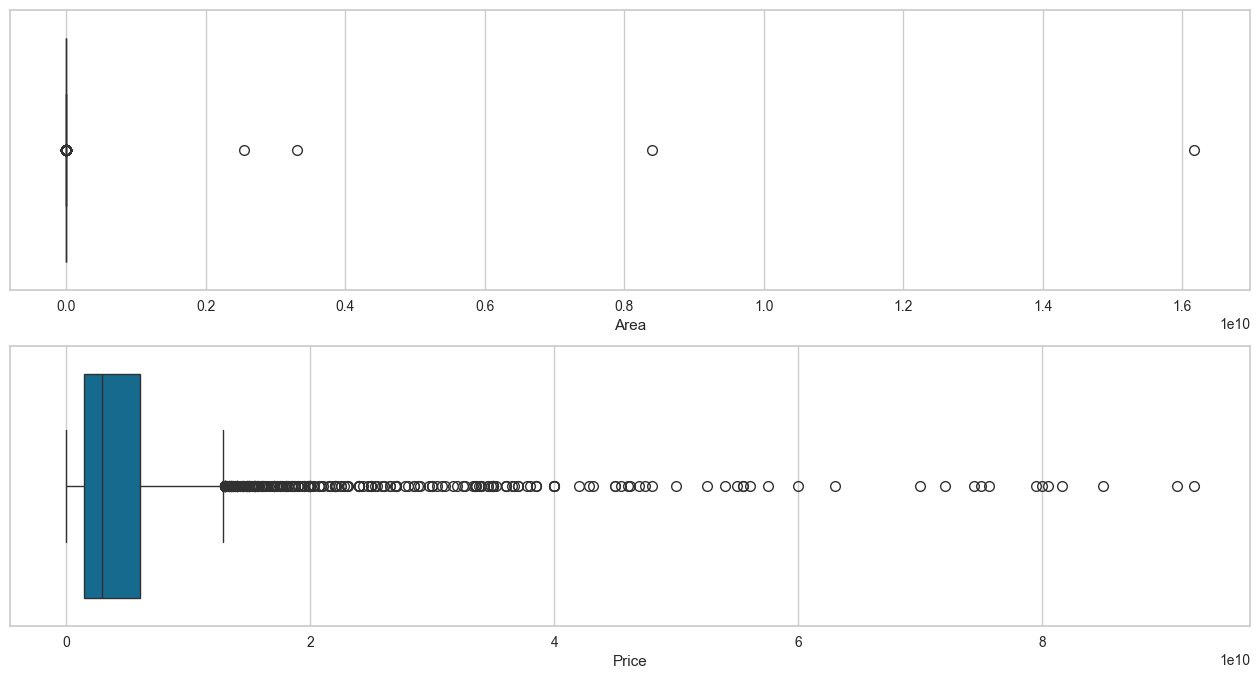

In [96]:
plt.figure(figsize = (16,8))

plt.subplot(2,1,1)
sns.boxplot(x = df['Area'])

plt.subplot(2,1,2)
sns.boxplot(x = df['Price'])

In [97]:
# house_price['Address']= le.fit_transform(house_price['Address'])


In [98]:
address_dummy = pd.get_dummies(df['Address'])
df_final = df.merge(address_dummy, left_index = True, right_index = True)
df_final.drop(columns = 'Address', inplace = True)
df_final.head(3)


,Area,Room,Parking,Warehouse,Elevator,Price,Abazar,Abbasabad,Absard,Abuzar,...,Waterfall,West Ferdows Boulevard,West Pars,Yaftabad,Yakhchiabad,Yousef Abad,Zafar,Zaferanieh,Zargandeh,Zibadasht
0,63,1,1,1,1,1850000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,60,1,1,1,1,1850000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,79,2,1,1,1,550000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
df_final

,Area,Room,Parking,Warehouse,Elevator,Price,Abazar,Abbasabad,Absard,Abuzar,...,Waterfall,West Ferdows Boulevard,West Pars,Yaftabad,Yakhchiabad,Yousef Abad,Zafar,Zaferanieh,Zargandeh,Zibadasht
0,63,1,1,1,1,1850000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,60,1,1,1,1,1850000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,79,2,1,1,1,550000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,95,2,1,1,1,902500000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,123,2,1,1,1,7000000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3474,86,2,1,1,1,3500000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3475,83,2,1,1,1,6800000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3476,75,2,0,0,0,365000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3477,105,2,1,1,1,5600000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
X = df_final.drop(columns = 'Price')
y = df_final['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(f"shape of x train: {X_train.shape}")
print(f"shape of y train: {y_train.shape}")
print(f"shape of x test: {X_test.shape}")
print(f"shape of y train: {y_test.shape}")

shape of x train: (2764, 197)
shape of y train: (2764,)
shape of x test: (692, 197)
shape of y train: (692,)


In [101]:
X.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Abazar',
       'Abbasabad', 'Absard', 'Abuzar', 'Afsarieh',
       ...
       'Waterfall', 'West Ferdows Boulevard', 'West Pars', 'Yaftabad',
       'Yakhchiabad', 'Yousef Abad', 'Zafar', 'Zaferanieh', 'Zargandeh',
       'Zibadasht'],
      dtype='object', length=197)

In [102]:
def parameter_finder (model, parameters):
    
    start = time.time()
    
    grid = GridSearchCV(model, 
                        param_grid = parameters, 
                        refit = True, 
                        cv = KFold(shuffle = True, random_state = 1), 
                        n_jobs = -1)
    grid_fit = grid.fit(X_train, y_train)
    y_train_pred = grid_fit.predict(X_train)
    y_pred = grid_fit.predict(X_test)
    
    train_score =grid_fit.score(X_train, y_train)
    test_score = grid_fit.score(X_test, y_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    
    model_name = str(model).split('(')[0]
    
    end = time.time()
    
    print(f"The best parameters for {model_name} model is: {grid_fit.best_params_}")
    print("--" * 10)
    print(f"(R2 score) in the training set is {train_score:0.2%} for {model_name} model.")
    print(f"(R2 score) in the testing set is {test_score:0.2%} for {model_name} model.")
    print(f"RMSE is {RMSE:,} for {model_name} model.")
    print("--" * 10)
    print(f"Runtime of the program is: {end - start:0.2f}")
    
       
    return train_score, test_score, RMSE

## LinearRegression 

In [103]:
lr = LinearRegression(n_jobs = -1)

lr_train_score, lr_test_score, lr_RMSE = parameter_finder(lr, {})


The best parameters for LinearRegression model is: {}
--------------------
(R2 score) in the training set is 60.40% for LinearRegression model.
(R2 score) in the testing set is 53.35% for LinearRegression model.
RMSE is 6,357,973,680.229975 for LinearRegression model.
--------------------
Runtime of the program is: 0.19


## Ridge

In [55]:
ridge = Ridge(random_state = 1) # Linear least squares with l2 regularization.
param_ridge = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

ridge_train_score, ridge_test_score, ridge_RMSE = parameter_finder(ridge, param_ridge)


The best parameters for Ridge model is: {'alpha': 0.001}
--------------------
(R2 score) in the training set is 60.40% for Ridge model.
(R2 score) in the testing set is 53.36% for Ridge model.
RMSE is 6,357,553,945.625038 for Ridge model.
--------------------
Runtime of the program is: 0.24


## Lasso

In [56]:
lasso = Lasso(random_state = 1) # Linear Model trained with L1 prior as regularizer.
param_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

lasso_train_score, lasso_test_score, lasso_RMSE = parameter_finder(lasso, param_lasso)

The best parameters for Lasso model is: {'alpha': 0.001}
--------------------
(R2 score) in the training set is 60.40% for Lasso model.
(R2 score) in the testing set is 53.35% for Lasso model.
RMSE is 6,357,953,517.829563 for Lasso model.
--------------------
Runtime of the program is: 7.70


## ElasticNet

In [57]:
eln = ElasticNet(random_state = 1) # Linear regression with combined L1 and L2 priors as regularizer.
param_eln = {'alpha': [0.001, 0.01, 0.1, 1, 10],
            'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7]}

eln_train_score, eln_test_score, eln_RMSE = parameter_finder(eln, param_eln)

The best parameters for ElasticNet model is: {'alpha': 0.001, 'l1_ratio': 0.7}
--------------------
(R2 score) in the training set is 59.51% for ElasticNet model.
(R2 score) in the testing set is 55.36% for ElasticNet model.
RMSE is 6,219,838,182.729824 for ElasticNet model.
--------------------
Runtime of the program is: 17.52


## DecisionTreeRegressor

In [58]:
dtr = DecisionTreeRegressor(random_state = 1)
param_dtr = {'min_samples_split': [2, 3, 4, 5],
            'min_samples_leaf': [1, 2, 3]}

dtr_train_score, dtr_test_score, dtr_RMSE = parameter_finder(dtr, param_dtr)

The best parameters for DecisionTreeRegressor model is: {'min_samples_leaf': 1, 'min_samples_split': 3}
--------------------
(R2 score) in the training set is 97.91% for DecisionTreeRegressor model.
(R2 score) in the testing set is 71.37% for DecisionTreeRegressor model.
RMSE is 4,980,876,315.211948 for DecisionTreeRegressor model.
--------------------
Runtime of the program is: 0.65


## RandomForestRegressor

In [59]:
rfr = RandomForestRegressor(random_state = 1, n_jobs = -1)
param_rfr = {'min_samples_split': [2, 3, 4, 5],
            'min_samples_leaf': [1, 2, 3]}

rfr_train_score, rfr_test_score, rfr_RMSE = parameter_finder(rfr, param_rfr)

The best parameters for RandomForestRegressor model is: {'min_samples_leaf': 1, 'min_samples_split': 3}
--------------------
(R2 score) in the training set is 94.05% for RandomForestRegressor model.
(R2 score) in the testing set is 77.55% for RandomForestRegressor model.
RMSE is 4,411,228,714.032563 for RandomForestRegressor model.
--------------------
Runtime of the program is: 22.04


## KNeighborsRegressor


In [104]:
knr = KNeighborsRegressor(n_jobs = -1)
param_knr = {'n_neighbors': [5, 10, 15, 20],
            'weights': ['uniform', 'distance']}

knr_train_score, knr_test_score, knr_RMSE = parameter_finder(knr, param_knr)

The best parameters for KNeighborsRegressor model is: {'n_neighbors': 20, 'weights': 'uniform'}
--------------------
(R2 score) in the training set is 60.39% for KNeighborsRegressor model.
(R2 score) in the testing set is 63.99% for KNeighborsRegressor model.
RMSE is 5,586,254,776.237762 for KNeighborsRegressor model.
--------------------
Runtime of the program is: 2.00


## What is XGBoost?

eXtreme Gradient Boosting (XGBoost) is a scalable and improved version of the gradient boosting algorithm (terminology alert) designed for efficacy, computational speed and model performance. It is an open-source library and a part of the Distributed Machine Learning Community. XGBoost is a perfect blend of software and hardware capabilities designed to enhance existing boosting techniques with accuracy in the shortest amount of time. 

What makes XGBoost a go-to algorithm for winning Machine Learning and Kaggle competitions?

<img src = "https://miro.medium.com/max/3280/1*1kjLMDQMufaQoS-nNJfg1Q.png" width=80%>

In [61]:
xgboost = XGBRegressor(n_jobs = -1)
param_xgboost = {'n_estimators': [100,300,500,1000],
             'learning_rate': [0.2,0.1,0.05],
             'subsample': [0.75],
             'colsample_bytree': [1],
             'max_depth': [3,4,5,6],
             'gamma': [0]}

xgboost_train_score, xgboost_test_score, xgboost_RMSE = parameter_finder(xgboost, param_xgboost)

The best parameters for XGBRegressor model is: {'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.75}
--------------------
(R2 score) in the training set is 92.52% for XGBRegressor model.
(R2 score) in the testing set is 76.15% for XGBRegressor model.
RMSE is 4,546,400,101.400556 for XGBRegressor model.
--------------------
Runtime of the program is: 71.66


## ExtraTreesRegressor

In [62]:
et=ExtraTreesRegressor(random_state = 1, n_jobs = -1)
param_et = {'min_samples_split': [2, 3, 4, 5],
           'min_samples_leaf': [1, 2, 3]}


et_train_score, et_test_score, et_RMSE = parameter_finder(et, param_et)            

The best parameters for ExtraTreesRegressor model is: {'min_samples_leaf': 1, 'min_samples_split': 2}
--------------------
(R2 score) in the training set is 99.18% for ExtraTreesRegressor model.
(R2 score) in the testing set is 77.82% for ExtraTreesRegressor model.
RMSE is 4,384,380,553.927444 for ExtraTreesRegressor model.
--------------------
Runtime of the program is: 44.56


## GradientBoostingRegressor

In [63]:
gbr=GradientBoostingRegressor(random_state = 1)
param_gbr = {'min_samples_split': [2, 3, 4, 5],
           'min_samples_leaf': [1, 2, 3]}


gbr_train_score, gbr_test_score, gbr_RMSE = parameter_finder(gbr, param_gbr)     

The best parameters for GradientBoostingRegressor model is: {'min_samples_leaf': 1, 'min_samples_split': 5}
--------------------
(R2 score) in the training set is 87.78% for GradientBoostingRegressor model.
(R2 score) in the testing set is 76.61% for GradientBoostingRegressor model.
RMSE is 4,502,663,224.051602 for GradientBoostingRegressor model.
--------------------
Runtime of the program is: 13.41


In [64]:
models_score = pd.DataFrame({'Training score': [lr_train_score, ridge_train_score, lasso_train_score, eln_train_score, dtr_train_score, rfr_train_score, knr_train_score,xgboost_train_score,et_train_score,gbr_train_score],
                             'Testing score': [lr_test_score, ridge_test_score, lasso_test_score, eln_test_score, dtr_test_score, rfr_test_score, knr_test_score,xgboost_test_score,et_test_score,gbr_test_score],
                             'RMSE': [lr_RMSE, ridge_RMSE, lasso_RMSE, eln_RMSE, dtr_RMSE, rfr_RMSE, knr_RMSE,xgboost_RMSE,et_RMSE,gbr_RMSE]},
                             index = ['LinearRegression', 'Ridge', 'Lasso','ElasticNet', 'DecisionTreeRegressor', 'RandomForestRegressor', 'KNeighborsRegressor','XGBoostRegressor','ExtraTreesRegressor','GradientBoostingRegressor'])

models_score

,Training score,Testing score,RMSE
LinearRegression,1,1,6357973680
Ridge,1,1,6357553946
Lasso,1,1,6357953518
ElasticNet,1,1,6219838183
DecisionTreeRegressor,1,1,4980876315
RandomForestRegressor,1,1,4411228714
KNeighborsRegressor,1,1,5586254776
XGBoostRegressor,1,1,4546400101
ExtraTreesRegressor,1,1,4384380554
GradientBoostingRegressor,1,1,4502663224


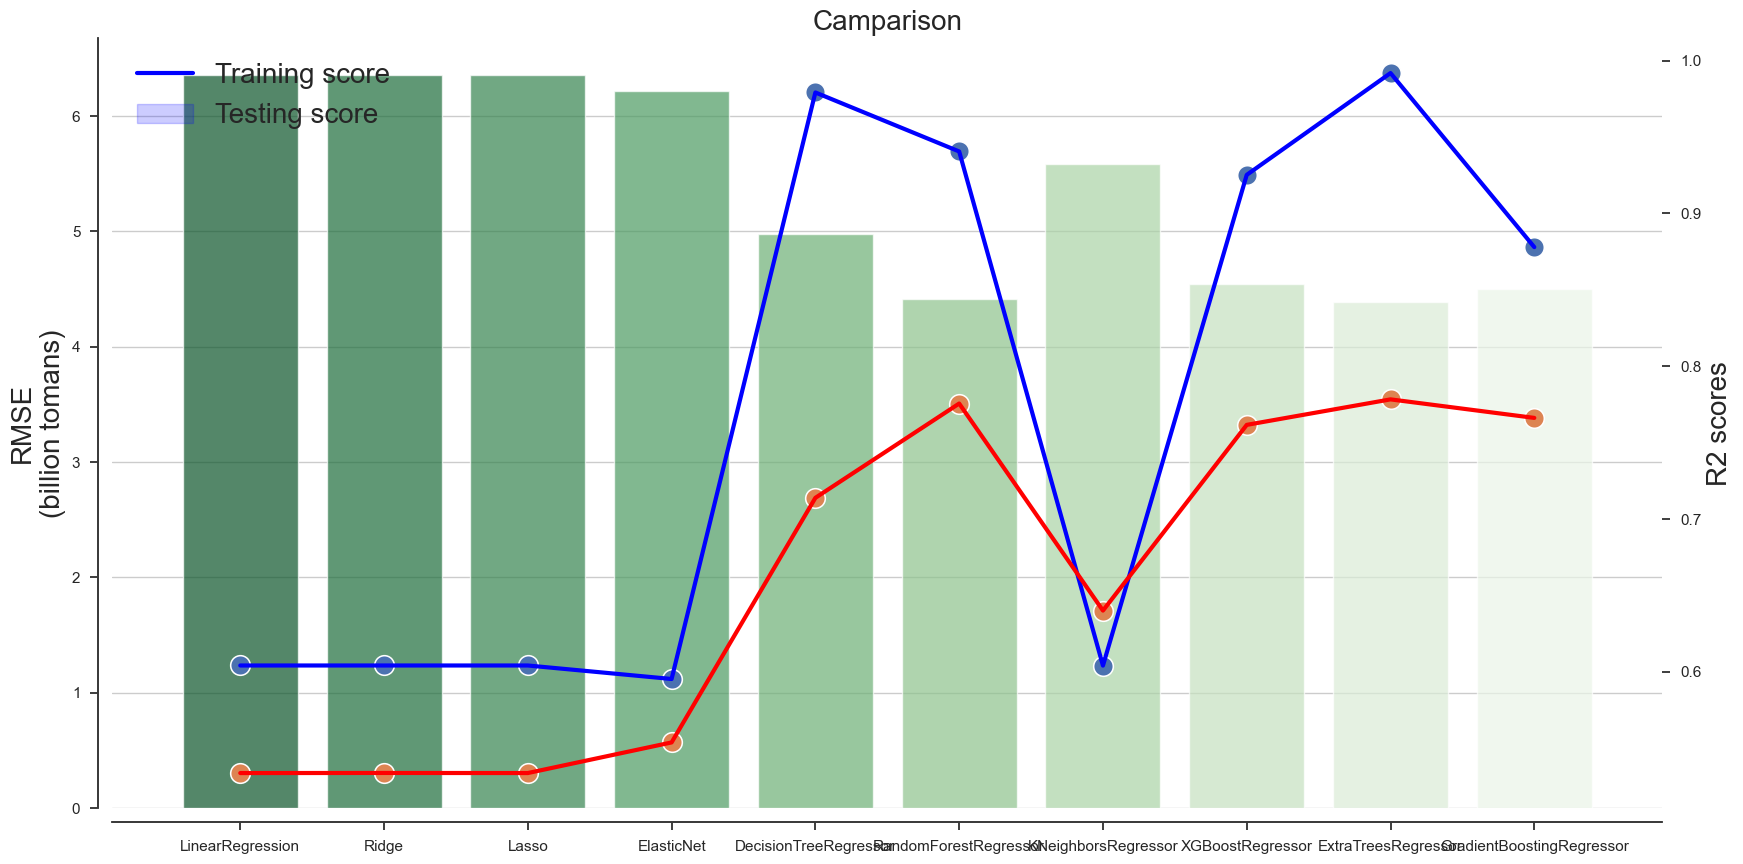

In [65]:
fig, ax = plt.subplots(figsize=(20,10))

sns.set(style='white')

ax.set_title("Camparison", fontsize = 20)

ax = sns.barplot(x = list(models_score.index), y = models_score['RMSE']/1000000000, alpha = 0.7, palette='Greens_r')

ax.set_ylabel("RMSE\n(billion tomans)", fontsize = 20)

sec_ax = ax.twinx()

sec_ax = sns.lineplot(x = list(models_score.index), y = models_score['Training score'], linewidth = 3, color = 'blue')
sec_ax = sns.scatterplot(x = list(models_score.index), y = models_score['Training score'], s = 200)

sec_ax = sns.lineplot(x = list(models_score.index), y = models_score['Testing score'], linewidth = 3, color = 'red')
sec_ax = sns.scatterplot(x = list(models_score.index), y = models_score['Testing score'], s = 200)

sec_ax.set_ylabel("R2 scores", fontsize = 20)

sec_ax.legend(labels = ['Training score', 'Testing score'], fontsize = 20)


sns.despine(offset = 10)

plt.show()

# Save your Model

In [105]:
knr20 = KNeighborsRegressor(n_jobs = -1)
param_knr = {'n_neighbors': [20],
            'weights': ['uniform']}

knr_train_score, knr_test_score, knr_RMSE = parameter_finder(knr, param_knr)

The best parameters for KNeighborsRegressor model is: {'n_neighbors': 20, 'weights': 'uniform'}
--------------------
(R2 score) in the training set is 60.39% for KNeighborsRegressor model.
(R2 score) in the testing set is 63.99% for KNeighborsRegressor model.
RMSE is 5,586,254,776.237762 for KNeighborsRegressor model.
--------------------
Runtime of the program is: 0.87


In [106]:
knr20_1=KNeighborsRegressor(n_neighbors=20, weights='uniform',n_jobs = -1)
knr20_1.fit(X_train,y_train)
y_pred=knr20_1.predict(X_test)

In [107]:
print('R^2:',r2_score(y_test, y_pred))

R^2: 0.6399080296386985


In [69]:
my_model = 'finalized_model.sav'
joblib.dump(knr20_1, my_model)

['finalized_model.sav']

In [108]:
joblib.dump(knr20_1, 'tehrandivarprice.joblib') 

['tehrandivarprice.joblib']

In [109]:
# load the model from disk
loaded_model = joblib.load('tehrandivarprice.joblib')
# result = loaded_model.score(X_test, y_test)
# print(result)

In [71]:
X_test.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Abazar',
       'Abbasabad', 'Absard', 'Abuzar', 'Afsarieh',
       ...
       'Waterfall', 'West Ferdows Boulevard', 'West Pars', 'Yaftabad',
       'Yakhchiabad', 'Yousef Abad', 'Zafar', 'Zaferanieh', 'Zargandeh',
       'Zibadasht'],
      dtype='object', length=197)

In [72]:
len(X_test.columns)
X_test.columns[194]

'Zaferanieh'

In [73]:
yhat =loaded_model.predict(X_test)
yhat

array([2.0811500e+09, 1.5125500e+09, 1.0632050e+09, 1.2018050e+09,
       8.8798000e+09, 2.7442500e+09, 3.3051250e+09, 2.4244000e+09,
       2.0387500e+09, 1.3411000e+09, 1.6410000e+10, 2.0185000e+09,
       1.9327500e+09, 2.0547500e+09, 6.9394000e+09, 3.3556250e+09,
       1.6824000e+10, 3.4204500e+09, 5.6360000e+09, 2.3251000e+09,
       2.0257500e+09, 4.0140000e+09, 9.5680000e+08, 3.5517500e+09,
       2.3064000e+09, 2.0335000e+09, 2.4980000e+09, 4.8441700e+09,
       1.0013750e+10, 1.0473250e+10, 1.7669400e+10, 7.4615000e+09,
       1.7371000e+09, 7.2195000e+08, 1.4775000e+09, 9.6752500e+09,
       2.1322500e+09, 2.9242500e+09, 3.1468075e+09, 3.3908075e+09,
       3.9082000e+09, 2.0838000e+09, 2.1369500e+09, 3.0724000e+09,
       1.8958750e+09, 7.5375000e+08, 2.5142500e+09, 2.9727500e+09,
       6.8249000e+09, 5.3790000e+09, 2.2855000e+09, 1.0640550e+09,
       2.5016500e+09, 7.2590000e+08, 2.9986250e+09, 2.1265000e+09,
       6.4606000e+09, 1.6499500e+09, 3.9770000e+09, 8.4225000e

In [74]:
y1_test =loaded_model.predict(X_test.iloc[2:4,])
y1_test

array([1.063205e+09, 1.201805e+09])

In [75]:
X_test.iloc[2,]

Area           53
Room            2
Parking         0
Warehouse       0
Elevator        0
               ..
Yousef Abad     0
Zafar           0
Zaferanieh      0
Zargandeh       0
Zibadasht       0
Name: 2845, Length: 197, dtype: int64

In [284]:
X_test

,Area,Room,Parking,Warehouse,Elevator,Abazar,Abbasabad,Absard,Abuzar,Afsarieh,...,Waterfall,West Ferdows Boulevard,West Pars,Yaftabad,Yakhchiabad,Yousef Abad,Zafar,Zaferanieh,Zargandeh,Zibadasht
3079,73,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2600,58,2,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2845,53,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3405,53,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
958,145,3,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2836,100,2,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,71,1,1,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1626,57,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2103,43,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
